Day 1-2: Dataset Exploration & Preprocessing


In [22]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set style for plots
sns.set_style('whitegrid')
%matplotlib inline

In [23]:
#  dataset
dataset = pd.read_csv('dataset.csv')
symptom_description = pd.read_csv('symptom_Description.csv')
symptom_precaution = pd.read_csv('symptom_precaution.csv')
symptom_severity = pd.read_csv('Symptom-severity.csv')

# Display the first few rows of each dataset
print("Main Dataset:")
display(dataset.head())

print("\nSymptom Description:")
display(symptom_description.head())

print("\nSymptom Precaution:")
display(symptom_precaution.head())

print("\nSymptom Severity:")
display(symptom_severity.head())

Main Dataset:


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Symptom Description:


,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...



Symptom Precaution:


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths



Symptom Severity:


,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [24]:
# Check basic info for each dataset
def explore_dataset(df, name):
    print(f"\n{name} Information:")
    print(f"Shape: {df.shape}")
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDescriptive Statistics:")
    display(df.describe(include='all'))

explore_dataset(dataset, "Main Dataset")
explore_dataset(symptom_description, "Symptom Description")
explore_dataset(symptom_precaution, "Symptom Precaution")
explore_dataset(symptom_severity, "Symptom Severity")


Main Dataset Information:
Shape: (4920, 18)

Data Types:
Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object

Missing Values:
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

Descriptive Statistics:


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72



Symptom Description Information:
Shape: (41, 2)

Data Types:
Disease        object
Description    object
dtype: object

Missing Values:
Disease        0
Description    0
dtype: int64

Descriptive Statistics:


,Disease,Description
count,41,41
unique,41,41
top,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
freq,1,1



Symptom Precaution Information:
Shape: (41, 5)

Data Types:
Disease         object
Precaution_1    object
Precaution_2    object
Precaution_3    object
Precaution_4    object
dtype: object

Missing Values:
Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64

Descriptive Statistics:


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
count,41,41,41,40,40
unique,41,32,34,30,24
top,Drug Reaction,Consult nearest hospital,exercise,consult doctor,follow up
freq,1,3,3,6,6



Symptom Severity Information:
Shape: (133, 2)

Data Types:
Symptom    object
weight      int64
dtype: object

Missing Values:
Symptom    0
weight     0
dtype: int64

Descriptive Statistics:


,Symptom,weight
count,133,133.000000
unique,132,NaN
top,fluid_overload,NaN
freq,2,NaN
mean,NaN,4.225564
std,NaN,1.323543
min,NaN,1.000000
25%,NaN,3.000000
50%,NaN,4.000000
75%,NaN,5.000000


In [25]:
# Handle missing values in the main dataset
# Fill numerical columns with median and categorical with mode
for col in dataset.columns:
    if dataset[col].dtype == 'object':
        dataset[col].fillna(dataset[col].mode()[0], inplace=True)
    else:
        dataset[col].fillna(dataset[col].median(), inplace=True)

# Verify no missing values remain
print("Missing values after treatment:")
print(dataset.isnull().sum())

Missing values after treatment:
Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64


C:\Users\hemas\AppData\Local\Temp\ipykernel_4888\656084657.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mode()[0], inplace=True)


In [26]:
# Clean symptom names (remove extra spaces, standardize formatting)
def clean_symptom_names(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip().str.lower()
    return df

dataset = clean_symptom_names(dataset)
symptom_severity = clean_symptom_names(symptom_severity)

# Check for duplicates
print("Duplicate rows in main dataset:", dataset.duplicated().sum())

# Remove duplicates if any
dataset.drop_duplicates(inplace=True)

Duplicate rows in main dataset: 4618


In [27]:
# Merge symptom severity with main dataset
# Assuming symptoms are in columns Symptom1, Symptom2, etc. in the main dataset
symptom_cols = [col for col in dataset.columns if 'Symptom' in col]

for col in symptom_cols:
    dataset = dataset.merge(symptom_severity, how='left', 
                           left_on=col, right_on='Symptom', 
                           suffixes=('', f'_{col}'))
    dataset.drop(columns=['Symptom'], inplace=True)  # Drop duplicate column

# Calculate total severity score
severity_cols = [col for col in dataset.columns if 'weight' in col]
dataset['Total_Severity'] = dataset[severity_cols].sum(axis=1)

In [28]:
# Encode disease names (target variable)
label_encoder = LabelEncoder()
dataset['Disease_Encoded'] = label_encoder.fit_transform(dataset['Disease'])

# One-hot encode symptoms if needed
# symptom_dummies = pd.get_dummies(dataset[symptom_cols].stack()).groupby(level=0).sum()
# dataset = pd.concat([dataset, symptom_dummies], axis=1)

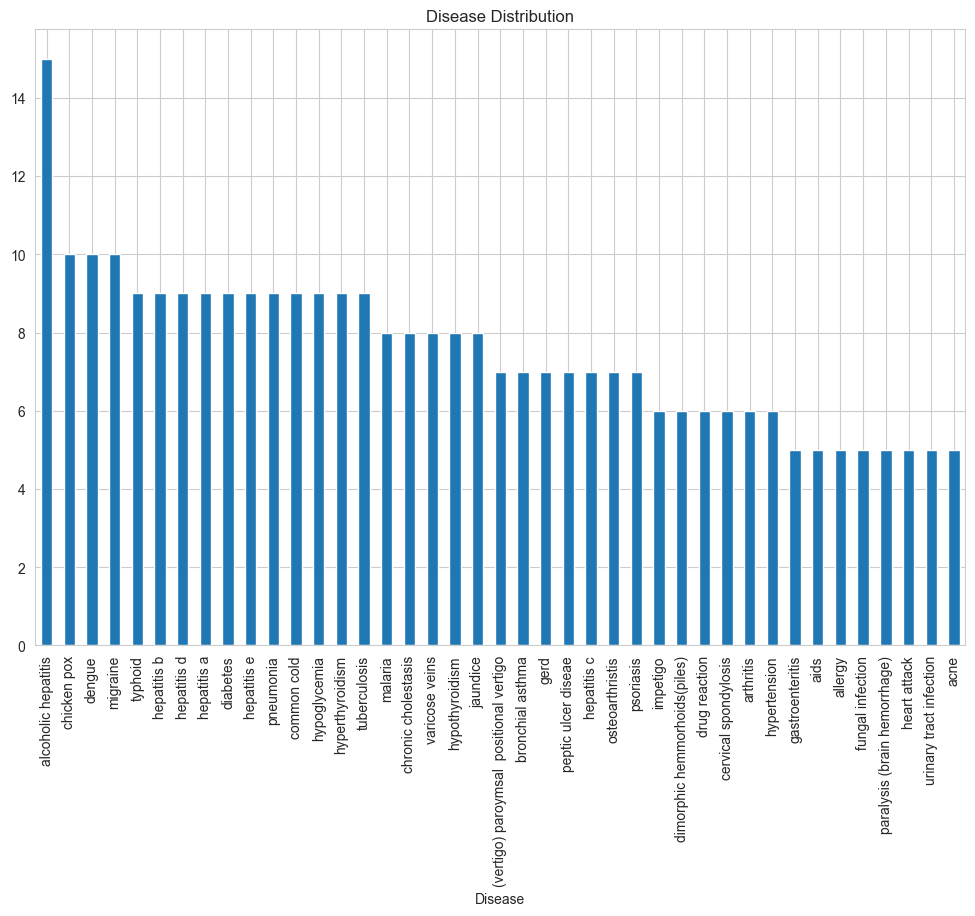

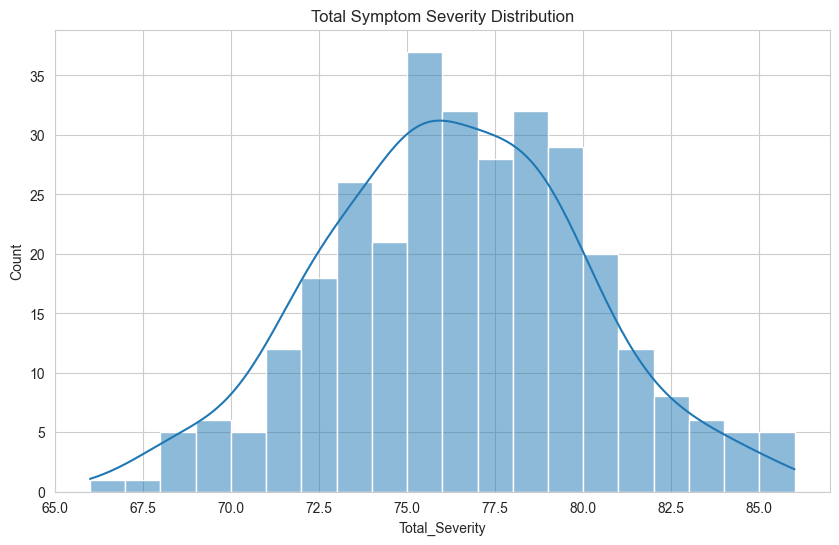

In [30]:
# Disease distribution
plt.figure(figsize=(12, 8))
dataset['Disease'].value_counts().plot(kind='bar')
plt.title('Disease Distribution')
plt.xticks(rotation=90)
plt.show()

# Symptom severity distribution
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Total_Severity'], bins=20, kde=True)
plt.title('Total Symptom Severity Distribution')
plt.show()

In [31]:
# Assuming 'Disease_Encoded' is our target variable
X = dataset.drop(columns=['Disease', 'Disease_Encoded'])
y = dataset['Disease_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 247
Testing set size: 62


In [32]:
# Save cleaned and processed datasets
dataset.to_csv('cleaned_dataset.csv', index=False)
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Baseline Model Development


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load data
df = pd.read_csv('cleaned_dataset.csv')

# Check for missing values
print("Missing values before treatment:")
print(df.isnull().sum())

# Handle missing values - fill with most frequent for categorical, median for numerical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Convert symptoms to numerical values
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Disease':
        df[col] = df[col].astype('category').cat.codes

# Encode target variable
le = LabelEncoder()
df['Disease'] = le.fit_transform(df['Disease'])

# Verify no missing values remain
print("\nMissing values after treatment:")
print(df.isnull().sum())

# Split data
X = df.drop('Disease', axis=1)
y = df['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data (for models that need it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Missing values before treatment:
Disease              0
Symptom_1            0
Symptom_2            0
Symptom_3            0
Symptom_4            0
Symptom_5            0
Symptom_6            0
Symptom_7            0
Symptom_8            0
Symptom_9            0
Symptom_10           0
Symptom_11           0
Symptom_12           0
Symptom_13           0
Symptom_14           0
Symptom_15           0
Symptom_16           0
Symptom_17           0
weight               0
weight_Symptom_2     2
weight_Symptom_3     5
weight_Symptom_4     5
weight_Symptom_5     1
weight_Symptom_6     0
weight_Symptom_7     0
weight_Symptom_8     0
weight_Symptom_9     0
weight_Symptom_10    0
weight_Symptom_11    0
weight_Symptom_12    0
weight_Symptom_13    0
weight_Symptom_14    0
weight_Symptom_15    0
weight_Symptom_16    0
weight_Symptom_17    0
Total_Severity       0
Disease_Encoded      0
dtype: int64

Missing values after treatment:
Disease              0
Symptom_1            0
Symptom_2            0
S

C:\Users\hemas\AppData\Local\Temp\ipykernel_4888\3105941364.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\hemas\AppData\Local\Temp\ipykernel_4888\3105941364.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Evaluate
y_pred = lr.predict(X_test_scaled)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.8387096774193549
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.33      0.50      0.40         2
           8       1.00      1.00      1.00         3
           9       0.00      0.00      0.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         1
          15       0.50      1.00      0.67         1
          16       0.0

c:\Users\hemas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hemas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hemas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train (no scaling needed)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
importances = rf.feature_importances_
print("\nTop 5 Important Features:")
for i in np.argsort(importances)[-5:]:
    print(f"{X.columns[i]}: {importances[i]:.4f}")


Random Forest Results:
Accuracy: 0.9838709677419355
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         1
          18       1.00     

In [47]:
from sklearn.svm import SVC

# Train
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)

# Evaluate
y_pred = svm.predict(X_test_scaled)
print("\nSVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVM Results:
Accuracy: 0.8548387096774194
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         3
           9       0.00      0.00      0.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       0.50      1.00      0.67         2
          14       1.00      1.00      1.00         1
          15       0.50      1.00      0.67         1
          16       0.00      0.00     

c:\Users\hemas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hemas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hemas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Evaluate
y_pred = knn.predict(X_test_scaled)
print("\nk-NN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


k-NN Results:
Accuracy: 0.8548387096774194
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         3
           9       0.00      0.00      0.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       0.67      1.00      0.80         2
          14       0.00      0.00      0.00         1
          15       0.50      1.00      0.67         1
          16       0.00      0.00    

c:\Users\hemas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hemas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hemas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [50]:
# In your training notebook, after training the model:
import joblib
import json

# Save model and feature names
joblib.dump(rf, 'disease_predictor_rf.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')

# Save the feature names (columns) that the model expects
with open('feature_names.json', 'w') as f:
    json.dump(list(X_train.columns), f)  # X_train from your training code

In [51]:
print("Model features:", model.feature_names_in_)

Model features: [' abdominal_pain' ' abnormal_menstruation' ' acidity'
 ' acute_liver_failure' ' altered_sensorium' ' anxiety' ' back_pain'
 ' belly_pain' ' blackheads' ' bladder_discomfort' ' blister'
 ' blood_in_sputum' ' bloody_stool' ' blurred_and_distorted_vision'
 ' breathlessness' ' brittle_nails' ' bruising' ' burning_micturition'
 ' chest_pain' ' chills' ' cold_hands_and_feets' ' coma' ' congestion'
 ' constipation' ' continuous_feel_of_urine' ' continuous_sneezing'
 ' cough' ' cramps' ' dark_urine' ' dehydration' ' depression'
 ' diarrhoea' ' dischromic _patches' ' distention_of_abdomen' ' dizziness'
 ' drying_and_tingling_lips' ' enlarged_thyroid' ' excessive_hunger'
 ' extra_marital_contacts' ' family_history' ' fast_heart_rate' ' fatigue'
 ' fluid_overload' ' foul_smell_of urine' ' headache' ' high_fever'
 ' hip_joint_pain' ' history_of_alcohol_consumption' ' increased_appetite'
 ' indigestion' ' inflammatory_nails' ' internal_itching'
 ' irregular_sugar_level' ' irritabil